<a href="https://colab.research.google.com/github/joelsoaresjr/PDF_Relatorio_Mensal/blob/main/PDF_Relatorio_mensal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install yfinance
!pip install fpdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bibliotecas

In [23]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime as dt
from fpdf import FPDF

Função Baixar dados Bacen

In [24]:
def busca_bacen(codigo):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst = True)
    df.set_index(df['data'], inplace = True)
    df.drop(columns = ['data'], inplace = True)
    return df


Pegando dados ipca e selic

In [25]:
ipca = busca_bacen(433)
selic = busca_bacen(432)

Gráfico IPCA

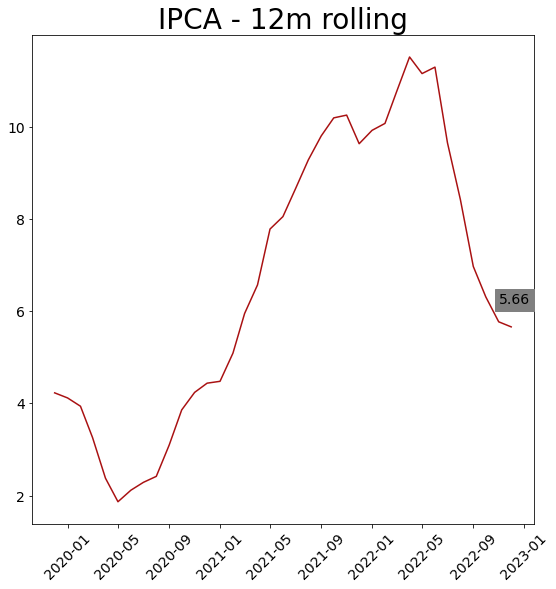

In [26]:
fig1 = plt.figure(figsize = (9,9))
plt.title("IPCA - 12m rolling",
          fontsize = 28)
plt.plot(ipca['2019-01-01':].rolling(12).sum().dropna(), color = '#A91112')
plt.xticks(rotation = 45,
           fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(ipca.index[-2], 
         ipca['2019-01-01':].rolling(12).sum().dropna()['valor'][-1]+0.5, 
         ipca['2019-01-01':].rolling(12).sum().dropna()['valor'][-1], 
         fontsize = 14,
         backgroundcolor = 'gray')
fig1.savefig("IPCA.png", dpi = 200)

Gráfico Selic

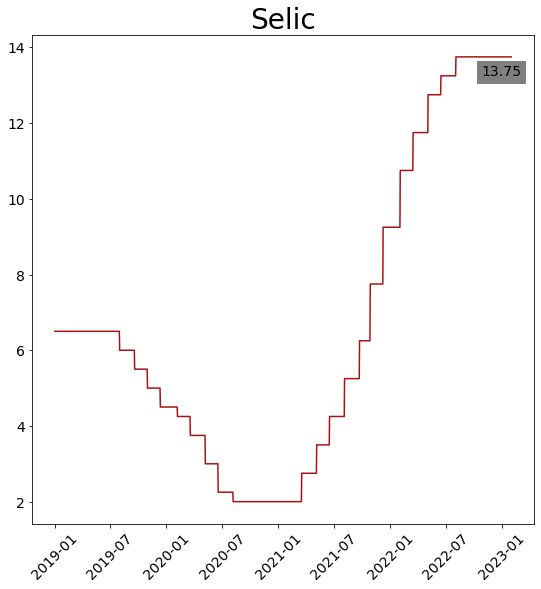

In [27]:
fig2 = plt.figure(figsize = (9,9))
plt.title("Selic",
          fontsize = 28)
plt.plot(selic['2019-01-01':], color = '#A91112')
plt.xticks(rotation = 45,
           fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(selic.index[-100], 
         selic['valor'][-1]-0.5, 
         selic['valor'][-1], 
         fontsize = 14,
         backgroundcolor = 'gray')
fig2.savefig("SELIC.png", dpi = 200)

Gráfico variacção diária



[*********************100%***********************]  3 of 3 completed


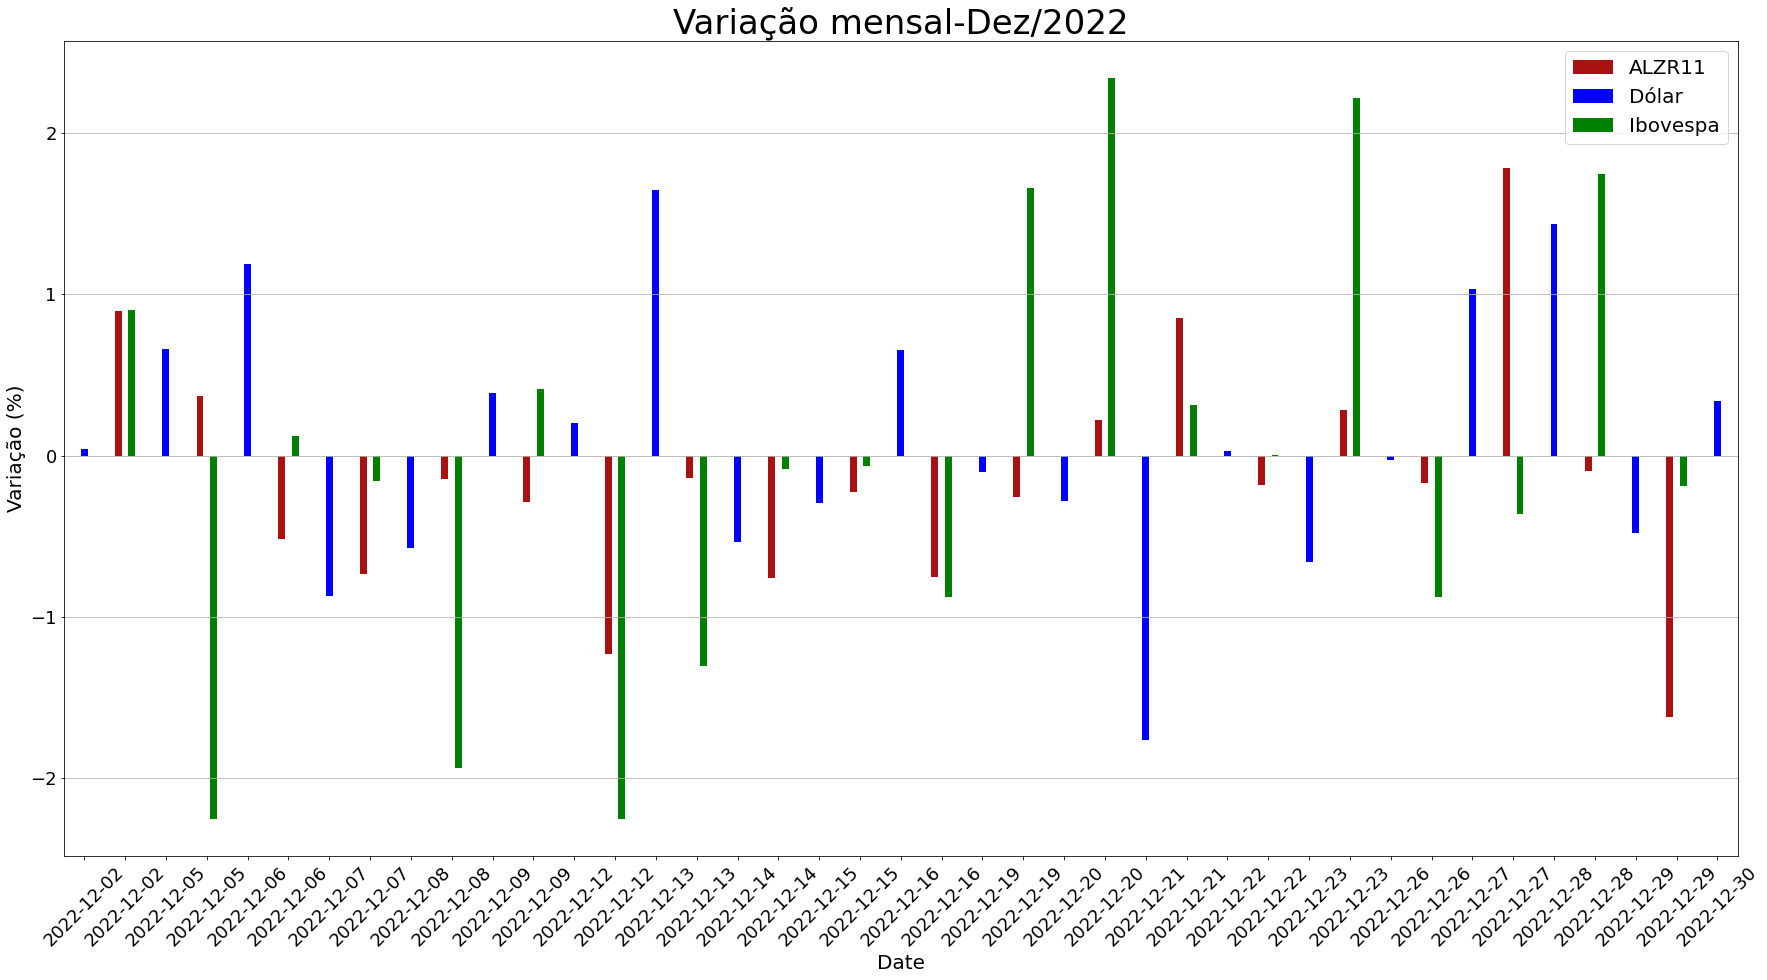

In [28]:
#Definir datas
inicio = dt(2022,12,1)
fim = dt(2022,12,31)
mes = 'Dez'

ticker = ['ALZR11.SA',  
          '^BVSP', 'USDBRL=X']

nomes = ['ALZR11', 'Dólar', 'Ibovespa']


cotacao = yf.download(ticker, inicio, fim, 
                      auto_adjust=True, period = '1d')['Close']


cotacao.columns = ['ALZR11', 'Dólar', 'Ibovespa']

cotacao['Date'] = pd.to_datetime(cotacao.index)
cotacao.index = cotacao['Date'].dt.date
cotacao.drop(columns = ['Date'], inplace = True)


cotacao_var = cotacao.pct_change().dropna()*100


cotacao_var.plot(kind = 'bar', color = ['#A91112','b','green'],
                 figsize = (30,15))
plt.title(f'Variação mensal-{mes}/{inicio.year}',
          fontsize = 34)
plt.ylabel('Variação (%)',
           fontsize = 20)
plt.xlabel('Date',
           fontsize = 20)
plt.xticks(rotation = 45,
           fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc = 1,
           fontsize = 20)
plt.grid(axis = 'y')
plt.savefig("Variação.png", dpi = 200)


Fundos IFIX

[*********************100%***********************]  111 of 111 completed

33 Failed downloads:
- SNFF11.SA: No data found for this date range, symbol may be delisted
- BTAL11.SA: No data found for this date range, symbol may be delisted
- HSAF11.SA: No data found for this date range, symbol may be delisted
- RBHG11.SA: No data found for this date range, symbol may be delisted
- TGAR11.SA: No data found for this date range, symbol may be delisted
- BTRA11.SA: No data found for this date range, symbol may be delisted
- CACR11.SA: No data found for this date range, symbol may be delisted
- DEVA11.SA: No data found for this date range, symbol may be delisted
- ARCT11.SA: No data found for this date range, symbol may be delisted
- BLMR11.SA: No data found for this date range, symbol may be delisted
- VGHF11.SA: No data found for this date range, symbol may be delisted
- TORD11.SA: No data found for this date range, symbol may be delisted
- MORC11.SA: No data found for this date range, symbo

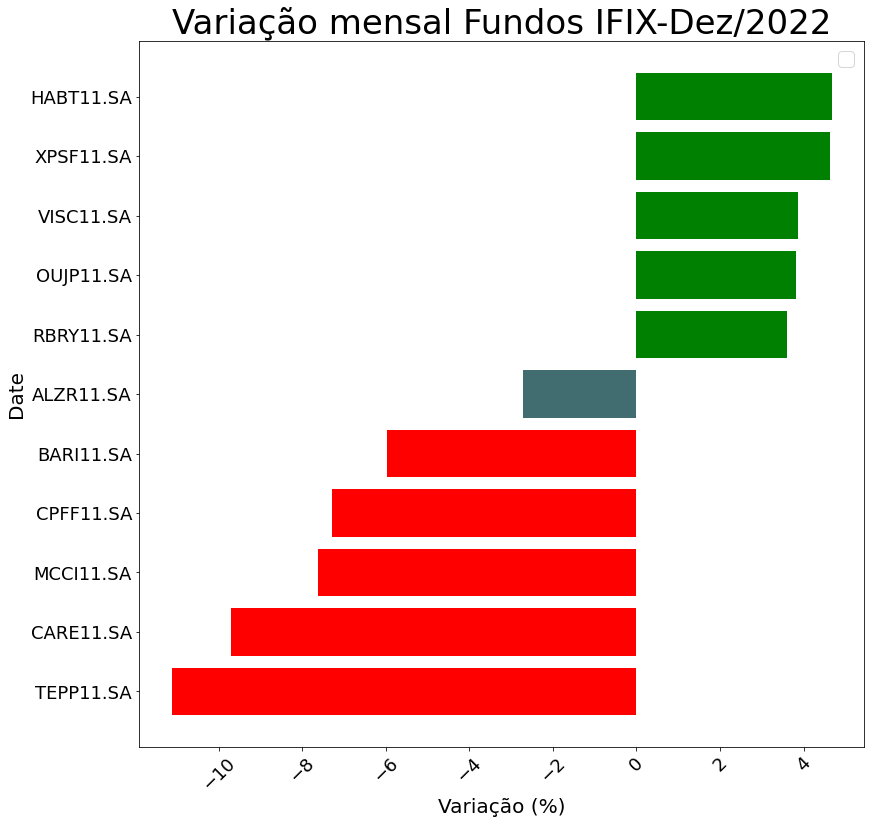

In [29]:
fundos_ifix = pd.read_excel('fundos-ifix.xlsx')


lista = []
for i in range(len(fundos_ifix)):
    lista.append(fundos_ifix['Código'][i]+'.SA')
    
fundos_ifix['ticker'] = lista
fundos_ifix.drop(columns = ['Código'], inplace = True)

cotacao_fundos_ifix = yf.download(lista, inicio, fim, 
                      auto_adjust=True, period = '1d')['Close']


cotacao_fundos_ifix.dropna(axis = 1, inplace = True)

cotacao_fundos_ifix_var = cotacao_fundos_ifix.pct_change().dropna().sum() * 100
top_5_mais = pd.DataFrame(cotacao_fundos_ifix_var.sort_values()[-5:])
top_5_menos = pd.DataFrame(cotacao_fundos_ifix_var.sort_values()[:5])
top_5 = pd.concat([top_5_menos, top_5_mais])
top_5.loc['ALZR11.SA'] = cotacao_fundos_ifix_var['ALZR11.SA']
top_5.sort_values(by =[0], inplace = True)
    


mask1 = top_5[0] < 0
mask2 = top_5[0] >= 0

fig4 = plt.figure(figsize = (13,13))
plt.title(f'Variação mensal Fundos IFIX-{mes}/{inicio.year}',
          fontsize = 34)
plt.xlabel('Variação (%)',
           fontsize = 20)
plt.ylabel('Date',
           fontsize = 20)
plt.xticks(rotation = 45,
           fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc = 1,
           fontsize = 20)
plt.barh(top_5.index[mask1],top_5[0][mask1],color = 'r')
plt.barh('ALZR11.SA', top_5[0]['ALZR11.SA'], color = '#416D71')
plt.barh(top_5.index[mask2],top_5[0][mask2],color = 'g')
plt.savefig("Variação_fundos_ifix.png", dpi = 200)

Criando PDF

In [32]:
width = 210
height = 297

pdf = FPDF()

#PAGE 1 
pdf.add_page()
pdf.image('topo.png', 0, 0, width)
pdf.image('barra.png', 40, height/2-30, 5)
pdf.image('alianza.png', 125, height - 25)
pdf.set_font('Arial', 'B', 40)
pdf.cell(40)
pdf.cell(0, 240, 'RELATÓRIO', 0, 0, 'L')
pdf.ln(20)
pdf.cell(40)
pdf.cell(0, 240, 'MENSAL - Jan/2023', 0, 0, 'L')
pdf.set_font('Arial','' ,15)


#PAGE 2
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, 'Relatório Semanal')
pdf.image('IPCA.png', 0, 25, width/2)
pdf.image('SELIC.png', width/2+1, 25, width/2)
pdf.image('Variação.png', 0, 130, width)
pdf.image('rodape.png', 0,height-18,width, 
          link = 'https://alianza.com.br/')

#PAGE 3
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, 'Relatório Semanal')
pdf.image('Variação_fundos_ifix.png', 0, 25, width)
pdf.image('rodape.png',0 ,height-18,width, 
          link = 'https://alianza.com.br/')


pdf.output('Relatório.pdf', 'F')

''